<a href="https://colab.research.google.com/github/AnthonySAJZ/WE1903/blob/main/Modelos_de_Machine_Learning_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS DE MACHINE LEARNING - REGRESIONES

## Librerías

In [3]:
# Import necessary libs

import pandas as pd
import numpy as np
from sklearn import preprocessing
from math import sqrt

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## Modelos de regresion
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Metricas de evaluación
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

#separar train and test
from sklearn.model_selection import train_test_split

# estadística y matemáticas
#import pandas as pd
import scipy.stats as scy
from scipy.stats import kurtosis

In [4]:
# Columnas a mostrar
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

## Datos del Negocio

In [8]:
dataset = pd.read_csv('demanda_data.csv',sep=';',parse_dates = ['tiempo'])
dataset

,tiempo,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
0,2005-01-01,45.08,19.9,1,B,1,0.585294,0.000000,0.000000,0,0,2032
1,2005-02-01,24.56,69.9,1,A,1,0.499286,0.000000,0.000000,0,0,603
2,2005-03-01,104.01,41.9,1,D,1,0.487209,0.000000,0.000000,0,0,10819
3,2005-04-01,59.23,33.9,1,B,1,0.498529,0.000000,0.000000,0,0,3508
4,2005-05-01,24.74,85.0,1,A,1,0.500000,0.000000,0.000000,0,0,612
...,...,...,...,...,...,...,...,...,...,...,...,...
3842,2015-07-19,14.93,22.9,1,B,1,0.497826,0.000000,0.000000,0,0,1765
3843,2015-07-20,31.43,49.9,1,A,1,0.631646,0.000000,0.000000,0,0,352
3844,2015-07-21,58.06,22.9,1,B,1,0.636111,0.000000,0.000000,0,0,1203
3845,2015-07-22,31.84,41.9,1,A,1,0.644615,0.000000,0.000000,0,0,222


## Análisis Exploratorio de los Datos (EDA)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tiempo                    3847 non-null   datetime64[ns]
 1   Costo                     3847 non-null   float64       
 2   PrecioOfertaProm          3847 non-null   float64       
 3   NroTipoOfertas            3847 non-null   int64         
 4   Marca                     3847 non-null   object        
 5   CantOfertas               3847 non-null   int64         
 6   MaxDescuento%             3847 non-null   float64       
 7   minDescuento%             3847 non-null   float64       
 8   FactordeDescuentos        3847 non-null   float64       
 9   FlagCampana               3847 non-null   int64         
 10  TieneUbicacionEspecifica  3847 non-null   int64         
 11  UnidadesDemandas          3847 non-null   int64         
dtypes: datetime64[ns](1)

In [10]:
dataset.isnull().sum()

tiempo                      0
Costo                       0
PrecioOfertaProm            0
NroTipoOfertas              0
Marca                       0
CantOfertas                 0
MaxDescuento%               0
minDescuento%               0
FactordeDescuentos          0
FlagCampana                 0
TieneUbicacionEspecifica    0
UnidadesDemandas            0
dtype: int64

In [11]:
dataset.shape

(3847, 12)

In [12]:
len(dataset.tiempo.unique()) #Nos indica que tenemos el dataset de los productos vendidos de forma diaria. Asimismo si este valor es el mismo que el de nuestro "dataset.shape" quiere decir que es nuestra Key / Llave

3847

## Gráfico para el target

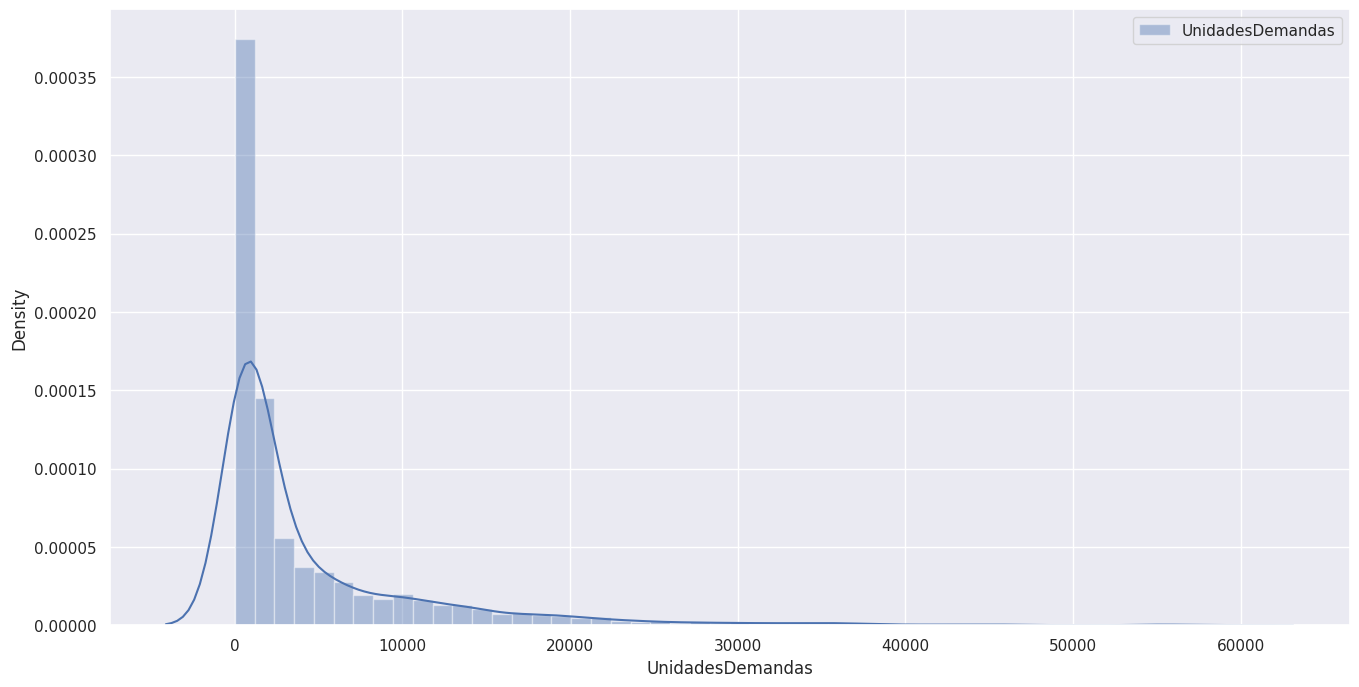

In [13]:
# Grouped boxplot
sns.set()
plt.figure(figsize=(16,8))
sns.distplot(dataset["UnidadesDemandas"] , label="UnidadesDemandas")
plt.legend()
plt.show()

## Suavizamos el target

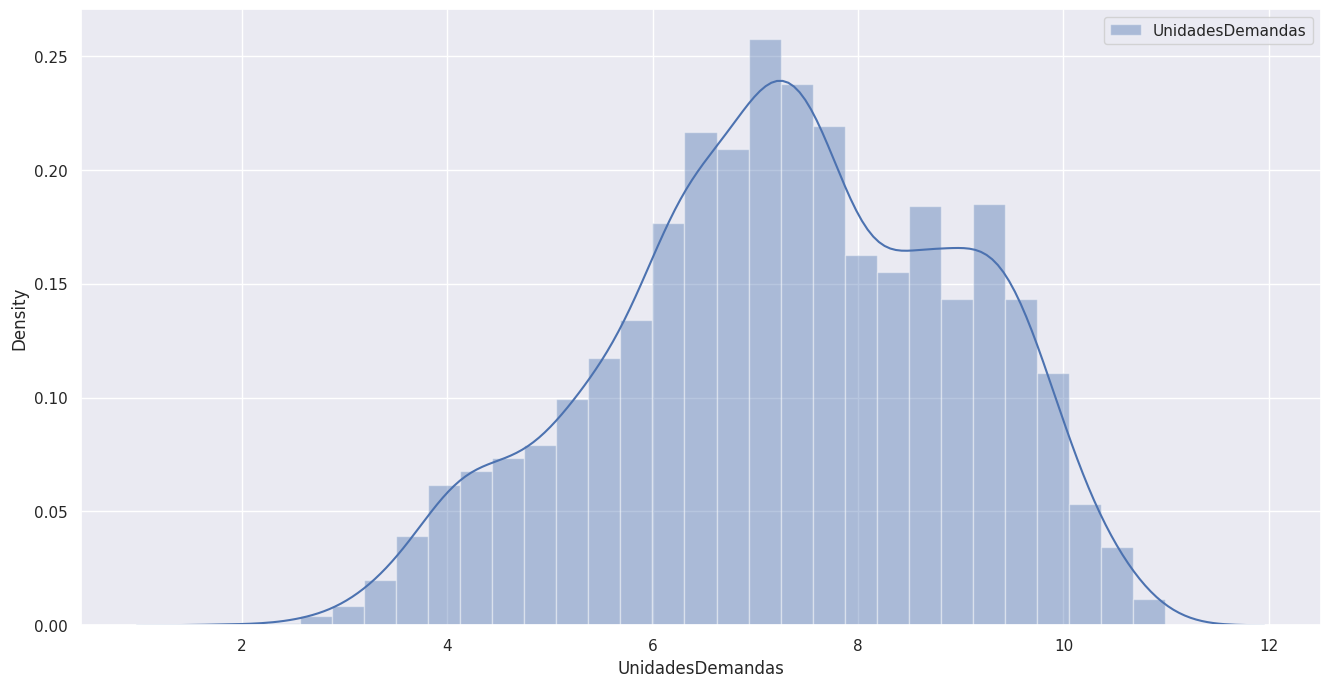

In [14]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(np.log(dataset["UnidadesDemandas"]) , label="UnidadesDemandas")
plt.legend()
plt.show()

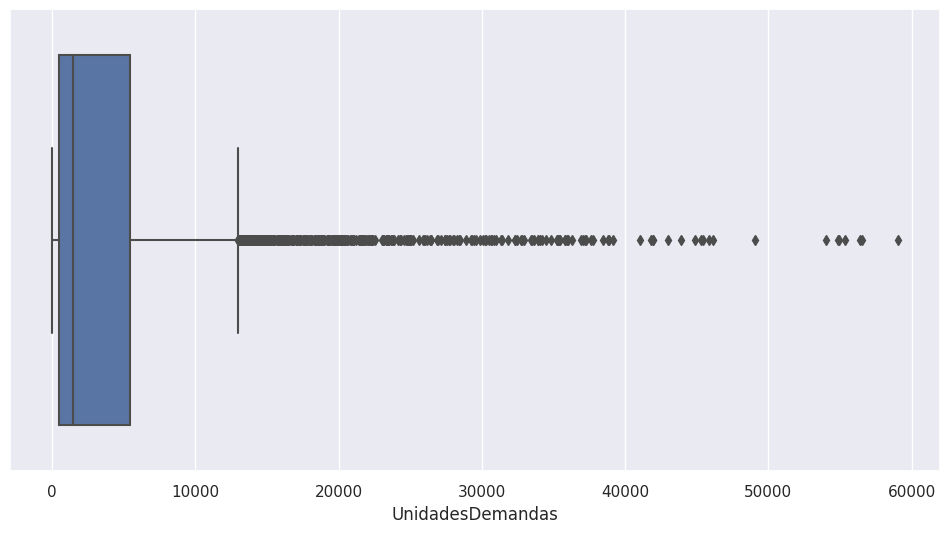

In [15]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='UnidadesDemandas', data=dataset);

## Analisis descriptivo cuantitativo

In [16]:
#target
target = ['UnidadesDemandas']

# data continua comercial
var_1 = ["PrecioOfertaProm", "Costo","MaxDescuento%","minDescuento%"]

In [17]:
dataset[var_1].describe()

,PrecioOfertaProm,Costo,MaxDescuento%,minDescuento%
count,3847.000000,3847.000000,3847.000000,3847.000000
mean,51.156202,46.805753,0.600289,0.076029
std,30.549777,35.658520,0.079967,0.150116
min,8.000000,2.600000,0.311250,0.000000
25%,29.900000,22.430000,0.540000,0.000000
50%,39.900000,34.940000,0.615753,0.000000
75%,72.900000,62.765000,0.656722,0.000000
max,149.000000,237.400000,0.810135,0.472632


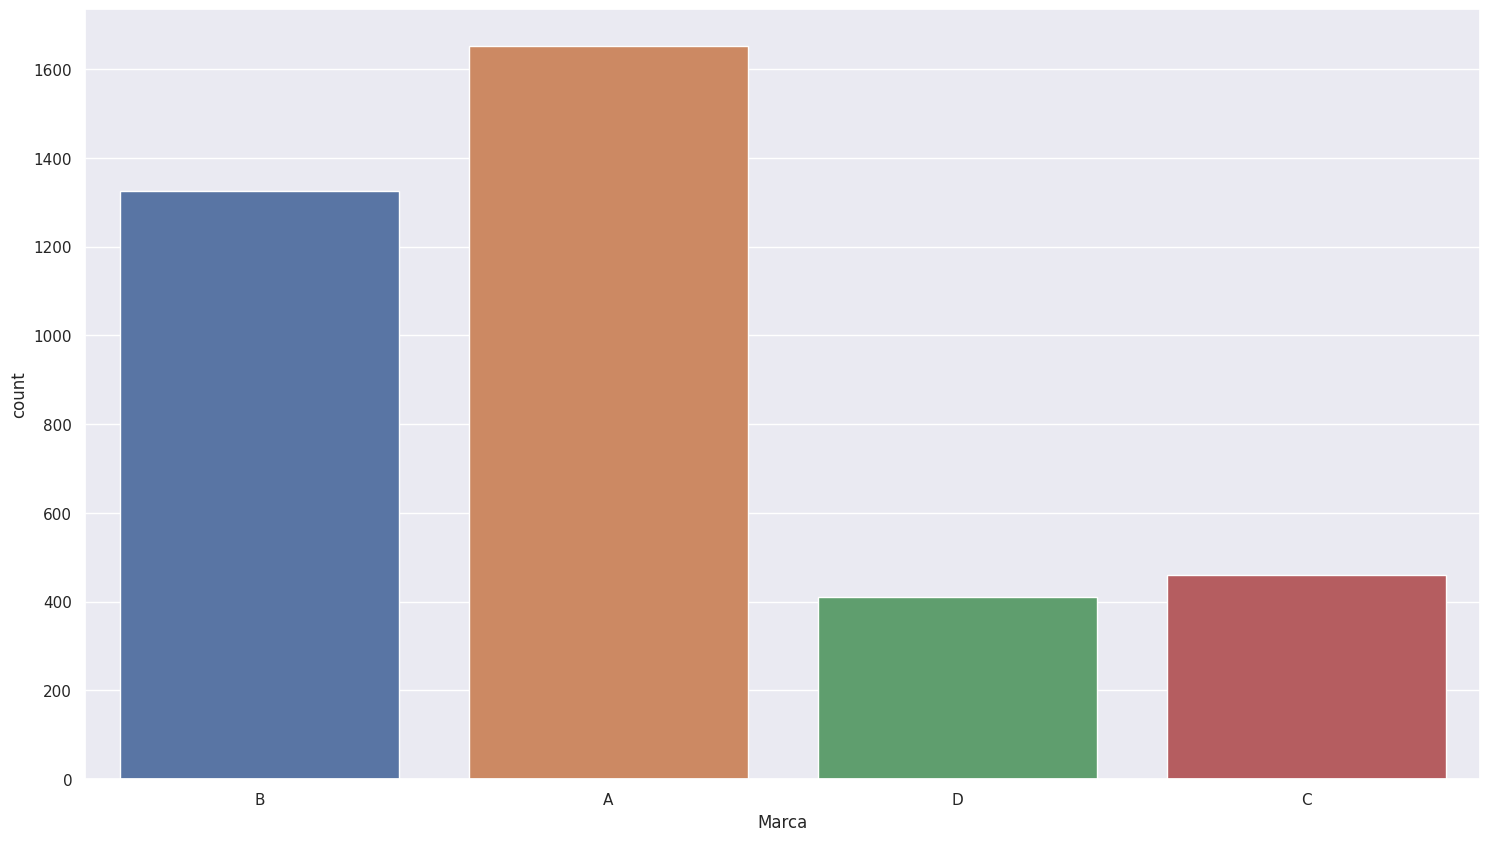

In [18]:
sns.set()
plt.figure(figsize=(18,10))
sns.countplot(x='Marca', data=dataset)
plt.show();

In [19]:
dataset['Marca'].value_counts()

A    1652
B    1325
C     459
D     411
Name: Marca, dtype: int64

In [20]:
dataset['Marca'].value_counts(normalize=True)

A    0.429426
B    0.344424
C    0.119314
D    0.106836
Name: Marca, dtype: float64

## Gráfico de Dispersión

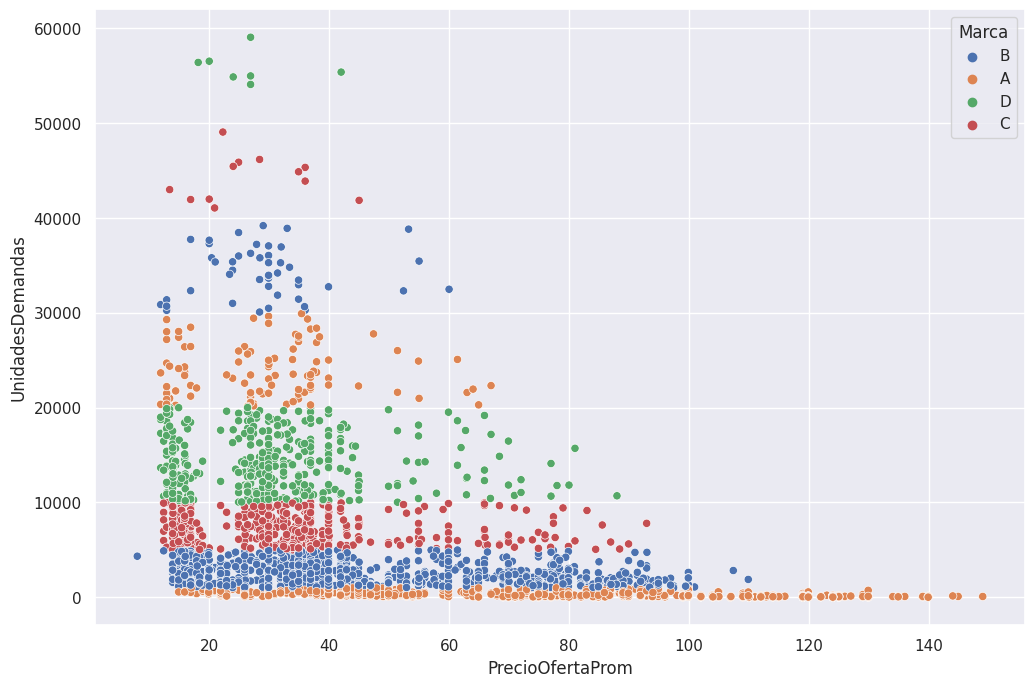

<Figure size 1200x800 with 0 Axes>

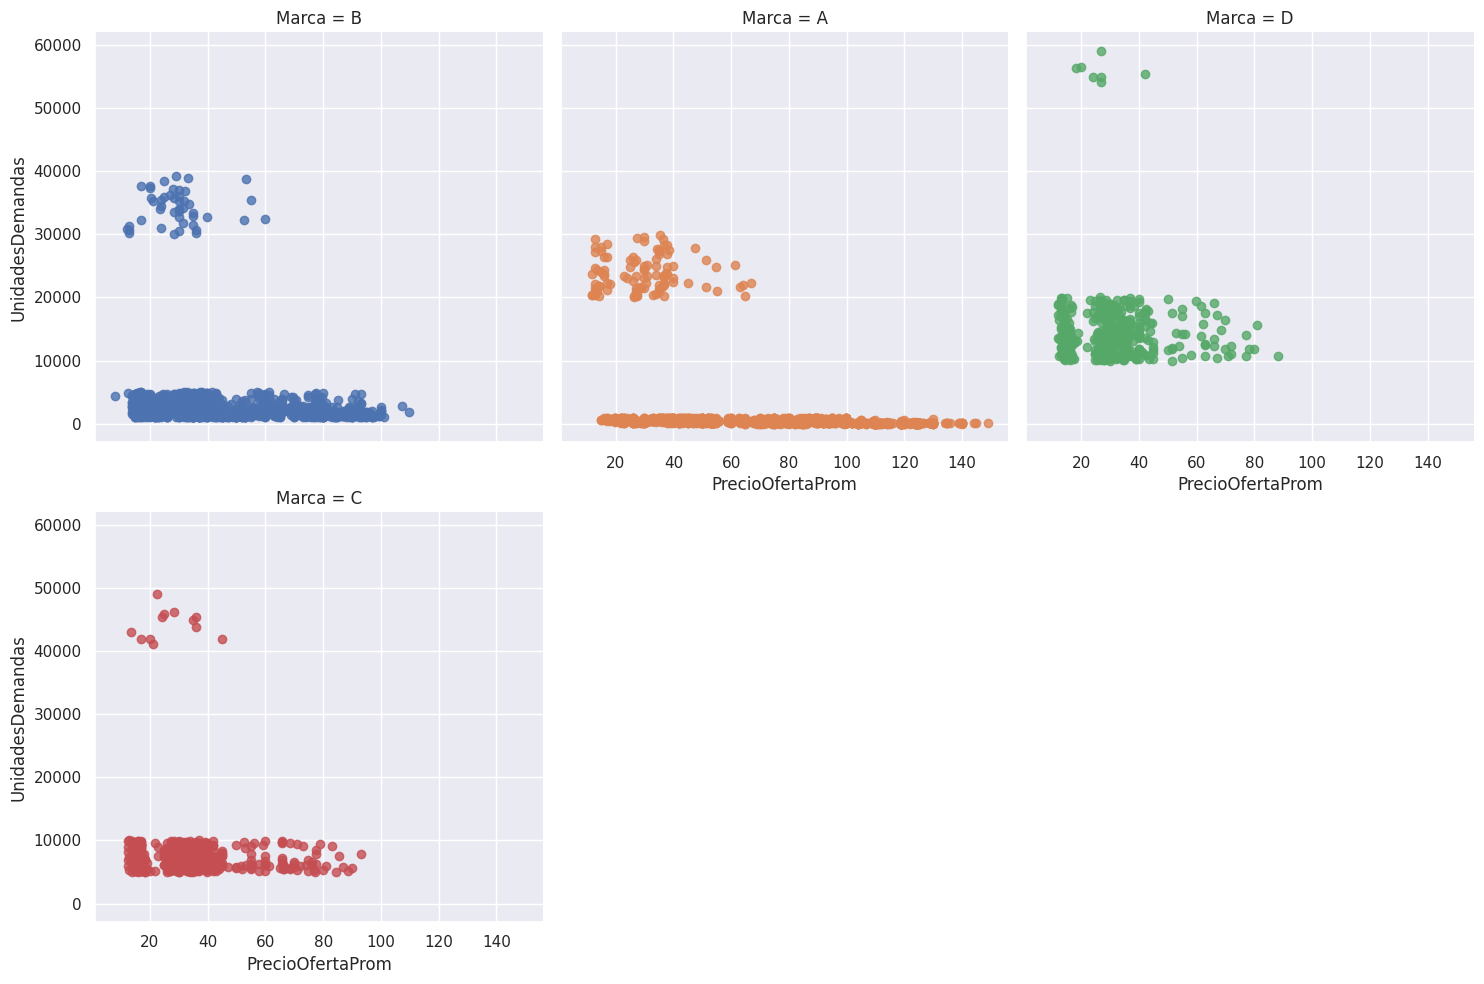

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='PrecioOfertaProm', y='UnidadesDemandas', data=dataset,hue='Marca')
plt.show()

## Por separado

plt.figure(figsize=(12,8))
sns.lmplot(x='PrecioOfertaProm', y='UnidadesDemandas', data=dataset,
           fit_reg=False,
           col= 'Marca',
           hue='Marca',
           col_wrap=3,
          )
plt.show()

## Evolución temporal de target

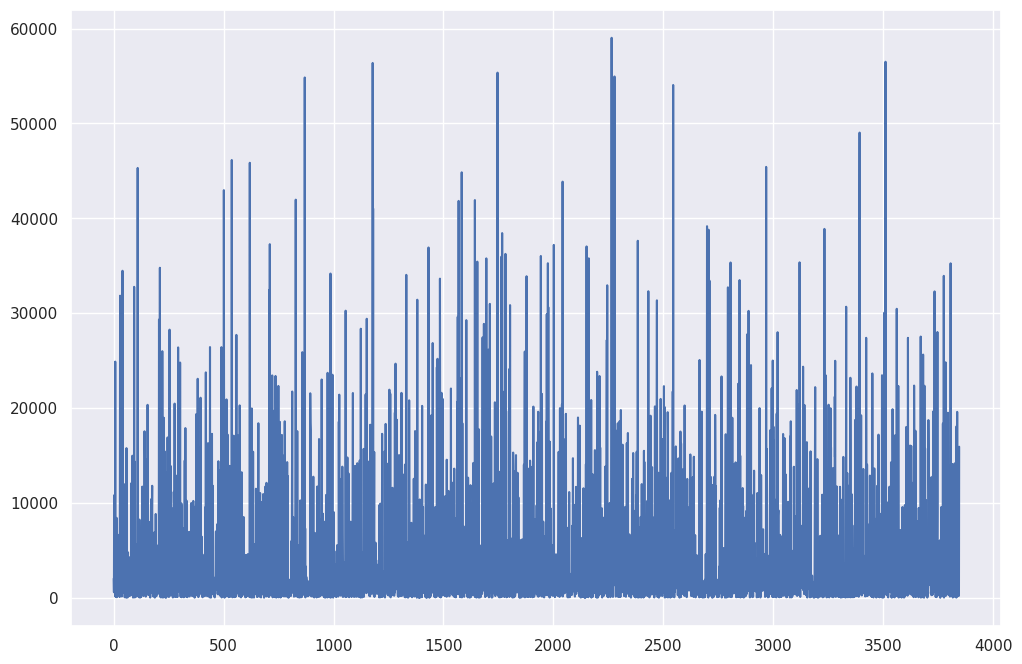

In [23]:
sns.set()
# Grouped boxplot
plt.figure(figsize=(12,8)) # Generamos una gráfica mas grande y visible

plt.plot(dataset['UnidadesDemandas'])
plt.show();

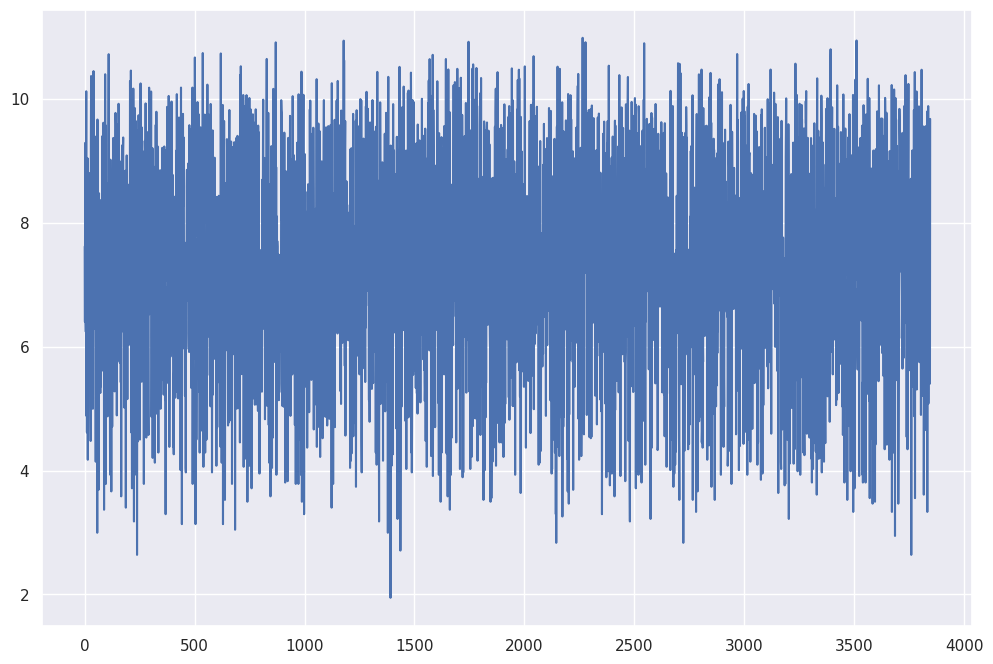

In [24]:
sns.set()
# Grouped boxplot
plt.figure(figsize=(12,8)) # Generamos una gráfica mas grande y visible

plt.plot(np.log(dataset['UnidadesDemandas']))
plt.show();

# Dispersión de algunas variables Cuantitativas

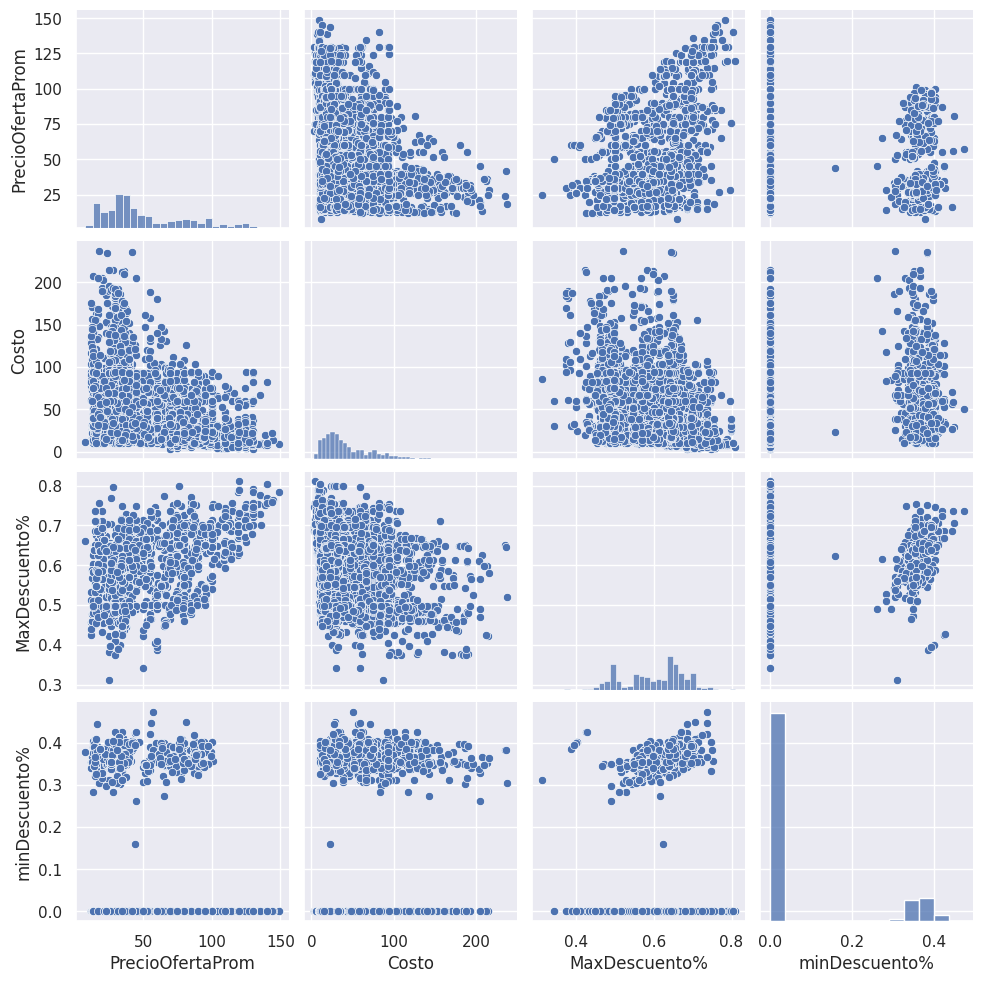

In [25]:
sns.pairplot(dataset[var_1]);

## Correlaciones de Pearson

In [26]:
dataset[var_1].corr(method= 'pearson')

,PrecioOfertaProm,Costo,MaxDescuento%,minDescuento%
PrecioOfertaProm,1.000000,-0.339035,0.437895,-0.096167
Costo,-0.339035,1.000000,-0.289330,0.300746
MaxDescuento%,0.437895,-0.289330,1.000000,0.131808
minDescuento%,-0.096167,0.300746,0.131808,1.000000


(4.0, 0.0)

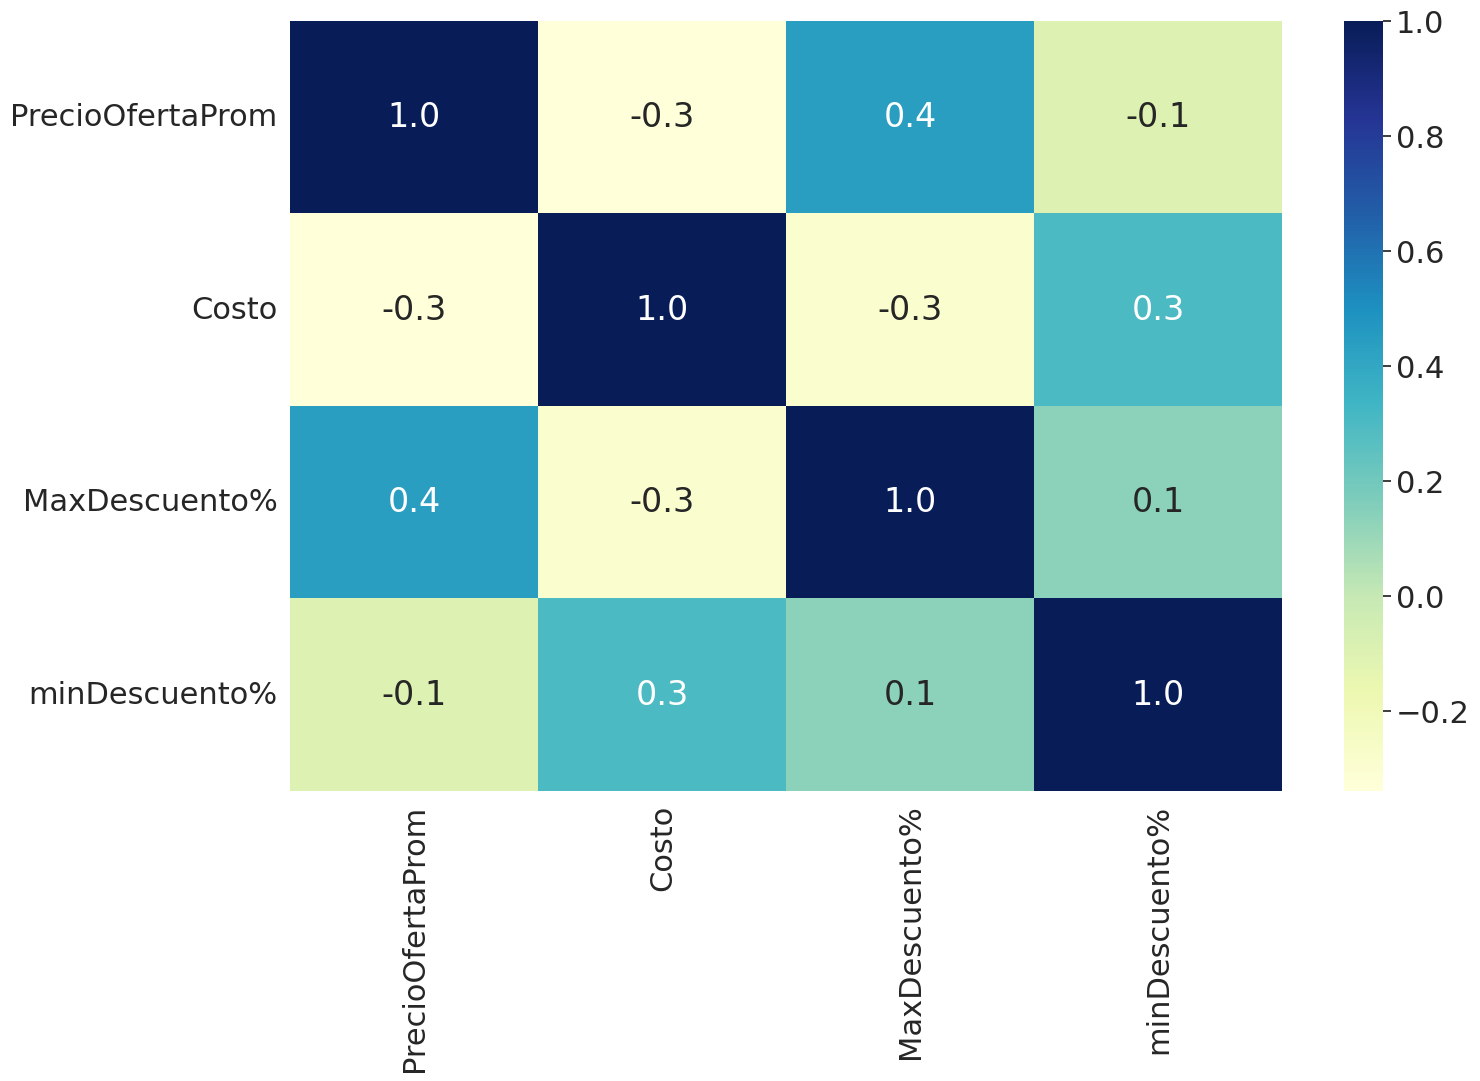

In [27]:
sns.set(font_scale=2)
corr_matrix = dataset[var_1].corr()
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corr_matrix,annot=True, fmt=".1f",cmap="YlGnBu")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

In [28]:
dataset.head()

,tiempo,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica,UnidadesDemandas
0,2005-01-01,45.08,19.9,1,B,1,0.585294,0.0,0.0,0,0,2032
1,2005-02-01,24.56,69.9,1,A,1,0.499286,0.0,0.0,0,0,603
2,2005-03-01,104.01,41.9,1,D,1,0.487209,0.0,0.0,0,0,10819
3,2005-04-01,59.23,33.9,1,B,1,0.498529,0.0,0.0,0,0,3508
4,2005-05-01,24.74,85.0,1,A,1,0.500000,0.0,0.0,0,0,612


## Preprocesing de la data

In [29]:
## selection of category variables
target = 'UnidadesDemandas'
exclude = ['tiempo']

cols = [x for x in dataset.columns if x not in exclude + [target]]
cols_cat = dataset[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)


## For Training

for i in cols_cat:
    le = preprocessing.LabelEncoder()  #Transforma informacion categorica en datos numericos(no se deben tener datros nulos)
    le.fit(list(dataset[i].dropna()))
    dataset.loc[~dataset[i].isnull(),i]=le.transform(dataset[i].dropna())

dataset[cols].head()

['tiempo'] 

 [3] ['Marca']


,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,CantOfertas,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana,TieneUbicacionEspecifica
0,45.08,19.9,1,1,1,0.585294,0.0,0.0,0,0
1,24.56,69.9,1,0,1,0.499286,0.0,0.0,0,0
2,104.01,41.9,1,3,1,0.487209,0.0,0.0,0,0
3,59.23,33.9,1,1,1,0.498529,0.0,0.0,0,0
4,24.74,85.0,1,0,1,0.500000,0.0,0.0,0,0


In [30]:
dataset.tiempo.min()

Timestamp('2005-01-01 00:00:00')

In [31]:
dataset.tiempo.max()

Timestamp('2015-12-07 00:00:00')

## Modelos de Regresión

### Selección de muestras de entrenamiento y validación

In [32]:
X_train = dataset[dataset.tiempo < '2015-06-01'].drop(['UnidadesDemandas','tiempo','CantOfertas','TieneUbicacionEspecifica'], axis=1)
X_test = dataset[dataset.tiempo >= '2015-06-01'].drop(['UnidadesDemandas','tiempo','CantOfertas','TieneUbicacionEspecifica'], axis=1)
y_train = dataset[dataset.tiempo < '2015-06-01'][['UnidadesDemandas']]
y_test= dataset[dataset.tiempo >= '2015-06-01'][['UnidadesDemandas']]

### Segundo método con split aleatorio

In [33]:
X = dataset.drop(['UnidadesDemandas','tiempo','CantOfertas','TieneUbicacionEspecifica'], axis=1)
y = dataset[['UnidadesDemandas']]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [35]:
X_test.shape

(770, 8)

In [36]:
y_test.shape

(770, 1)

## Regresion Lineal Estadística

In [37]:
y_train.head()

,UnidadesDemandas
2838,1241
3015,7231
1337,1214
3808,991
2142,2060


In [67]:
M_R = sm.OLS(np.sqrt(y_train),X_train).fit()

In [39]:
M_R.summary()  #EL VALOR F - STATISTIC DEBE SER MENOR QUE 0.05 PARA QUE EL MODELO SEA VALIDO

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       UnidadesDemandas   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              2726.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:19:43   Log-Likelihood:                         -14092.
No. Observations:                3077   AIC:                                  2.820e+04
Df Residuals:                    3069   BIC:                                  2.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Costo                  0.4885      0.014     35.367      0.000       0.461       0.516
PrecioOfertaProm      -0.1680      0.017    -10.029      0.000      -0.201      -0.135
NroTipoOfertas        21.3922      2.048     10.443      0.000      17.376      25.409
Marca                 16.4369      0.559     29.402      0.000      15.341      17.533
MaxDescuento%         -5.1004      4.044     -1.261      0.207     -13.030       2.829
minDescuento%        136.4564     33.782      4.039      0.000      70.219     202.694
FactordeDescuentos  -233.5175     51.852     -4.504      0.000    -335.186    -131.849
FlagCampana          -52.2992     15.585     -3.356      0.001     -82.858     -21.740
==============================================================================
Omnibus:                     1826.525   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19515.895
Skew:                           2.674   Prob(JB):                         0.00
Kurtosis:                      14.119   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regresión Lineal Múltiple

In [40]:
X_train.shape

(3077, 8)

In [41]:
X_train.head()

,Costo,PrecioOfertaProm,NroTipoOfertas,Marca,MaxDescuento%,minDescuento%,FactordeDescuentos,FlagCampana
2838,74.93,51.90,1,1,0.648750,0.000000,0.000000,0
3015,32.18,29.90,1,2,0.427143,0.427143,0.000000,1
1337,34.84,94.45,2,1,0.683908,0.401724,0.274742,0
3808,31.48,17.00,2,0,0.651724,0.000000,0.000000,0
2142,45.39,86.95,2,1,0.700000,0.386875,0.270813,0


## Usando el api de SKlearn

In [42]:
lm = LinearRegression()
lm.fit(X_train,np.sqrt(y_train))

LinearRegression()

In [43]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [44]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[   0.42742001   -0.17700935    9.89161202   13.24663507 -102.13643993
    80.44225233  -68.0070035   -45.8175811 ]]


In [45]:
## Coefiencientes del modelo
rL_coefficient = pd.DataFrame()
rL_coefficient["Columns"]= X_train.columns
rL_coefficient['Coefficient_Estimate'] = pd.DataFrame(lm.coef_).T
rL_coefficient

,Columns,Coefficient_Estimate
0,Costo,0.427420
1,PrecioOfertaProm,-0.177009
2,NroTipoOfertas,9.891612
3,Marca,13.246635
4,MaxDescuento%,-102.136440
5,minDescuento%,80.442252
6,FactordeDescuentos,-68.007004
7,FlagCampana,-45.817581


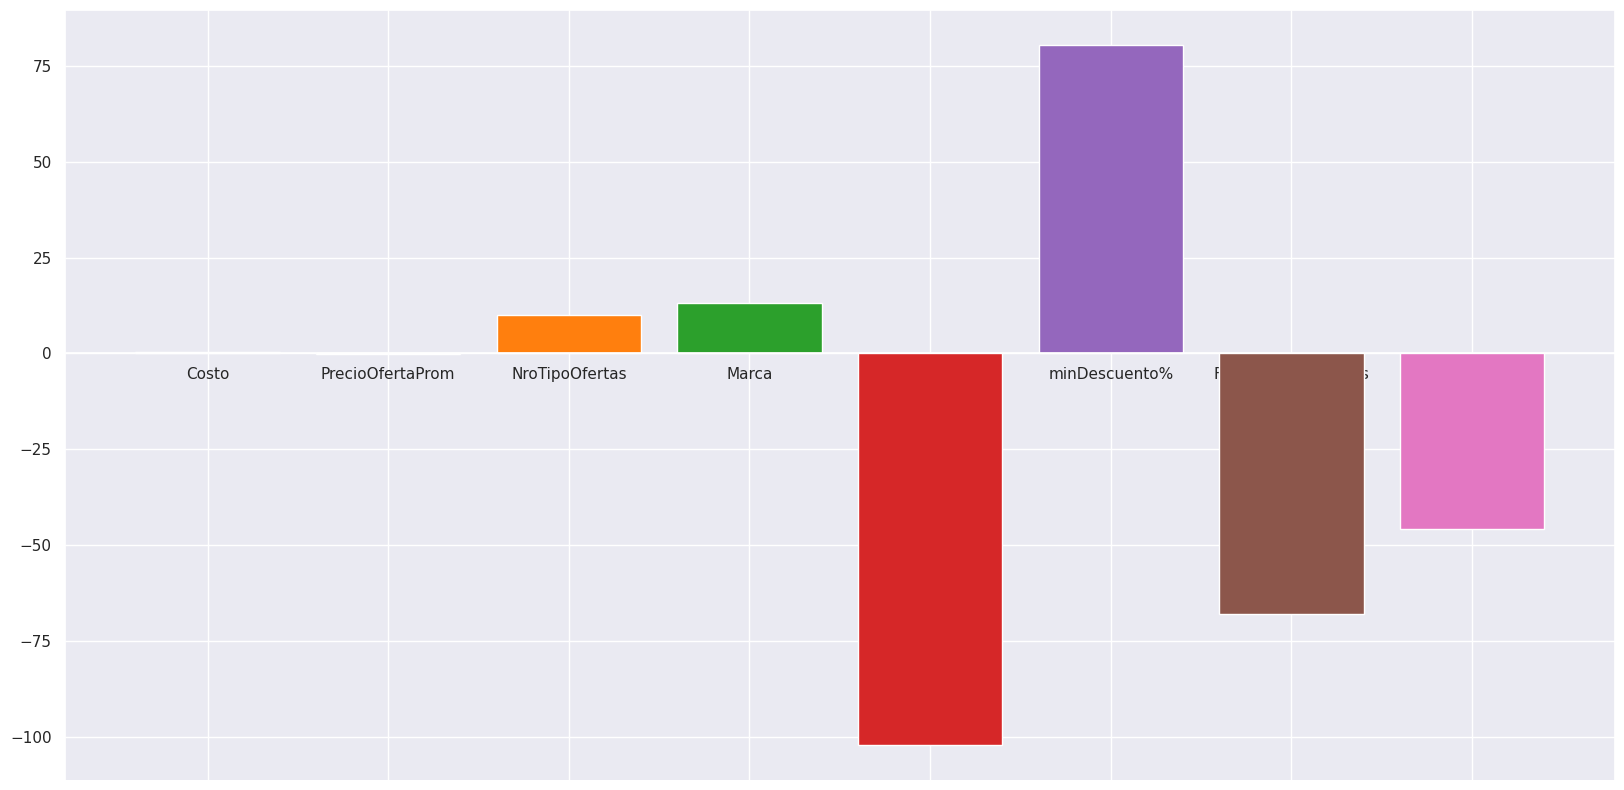

In [46]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive']

ax.bar(X_train.columns ,
rL_coefficient.Coefficient_Estimate,
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Performace del Modelo

In [47]:
np.log(4)

1.3862943611198906

In [48]:
np.exp(np.log(4))

4.0

## Definimos la función del MAPE

In [49]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
#predicciones
predictions = lm.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

MAE: 1951.2112086741483
MSE: 19916054.70853887
RMSE: 4462.740717153403
MAPE: 84.90725082872484


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

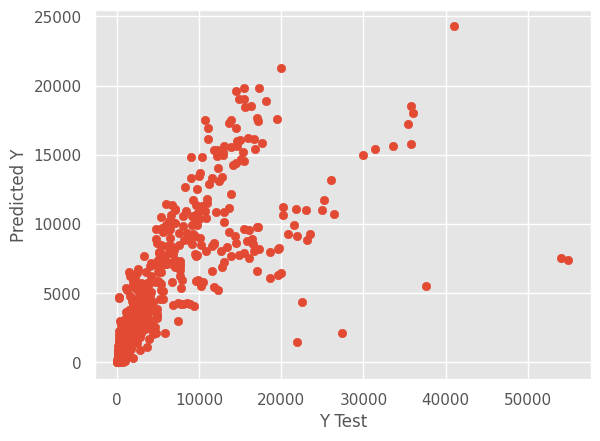

In [51]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Regresión Ridge

In [52]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, np.sqrt(y_train))

Ridge(alpha=1)

In [53]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient_Estimate'] = pd.DataFrame(model_ridge.coef_).T
ridge_coefficient

,Columns,Coefficient_Estimate
0,Costo,0.430993
1,PrecioOfertaProm,-0.183328
2,NroTipoOfertas,10.277412
3,Marca,13.443235
4,MaxDescuento%,-96.331095
5,minDescuento%,30.484486
6,FactordeDescuentos,6.988859
7,FlagCampana,-22.403041


## Gráfico de los Parámetros del Modelo Ridge

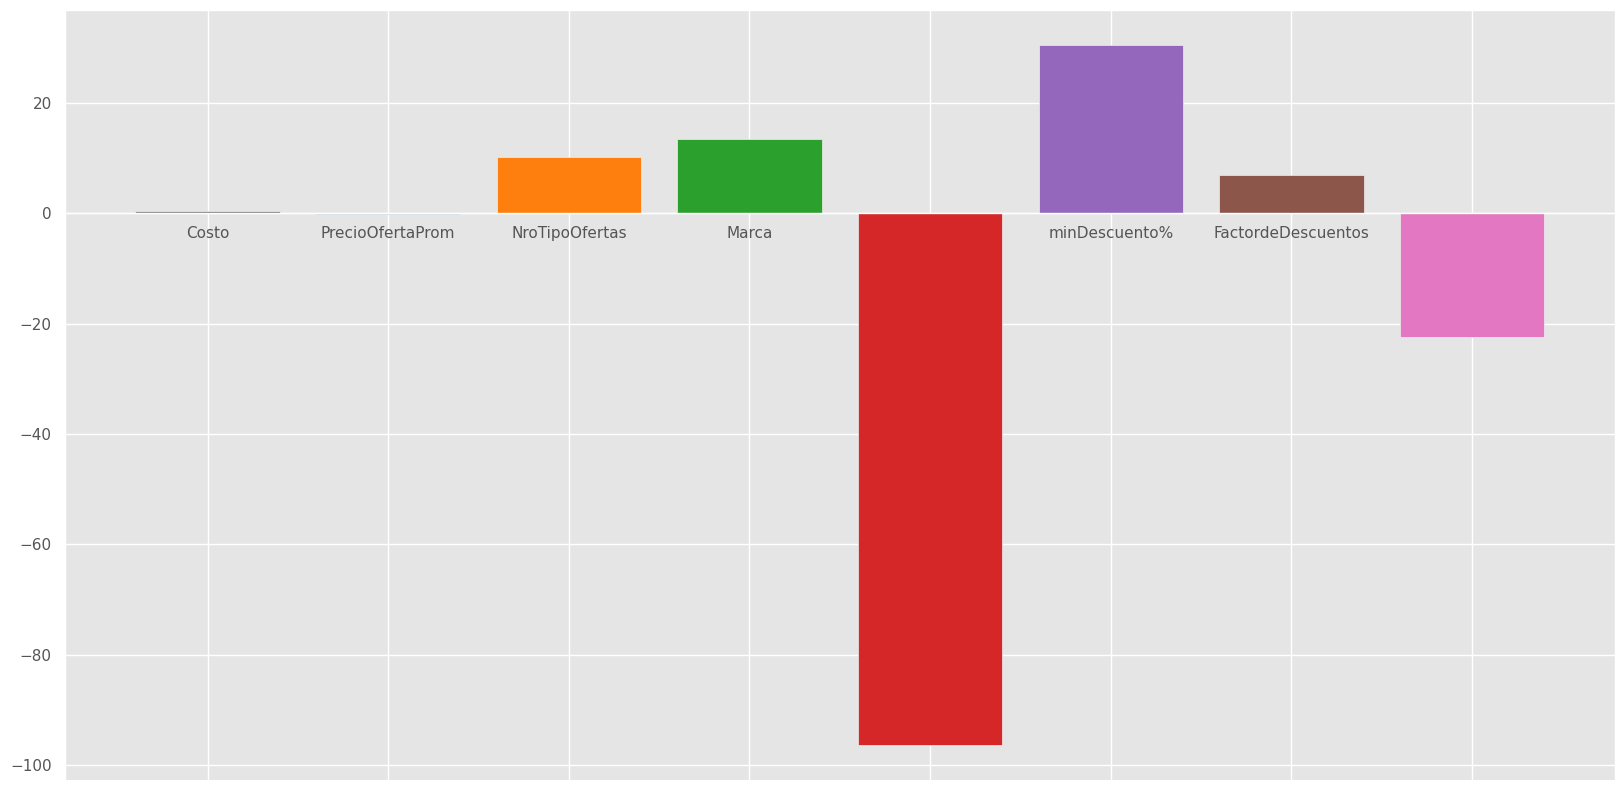

In [54]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive']

ax.bar(X_train.columns ,
ridge_coefficient.Coefficient_Estimate,
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Performace del Modelo

In [55]:
pred_test_rr= model_ridge.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_rr))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_rr)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_rr))

MAE: 1948.9356173610272
MSE: 19947449.378833383
RMSE: 4466.256752453153
MAPE: 84.8892937295808


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

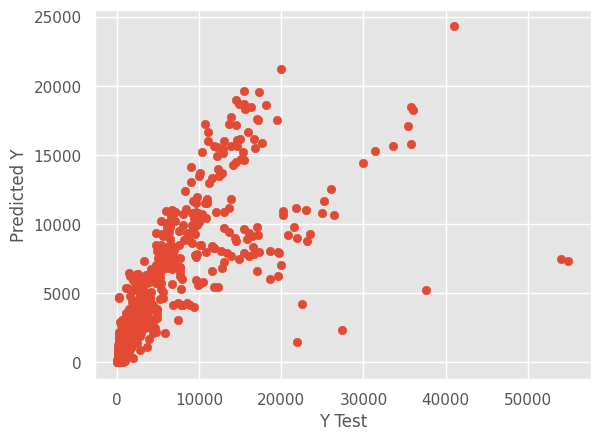

In [56]:
plt.scatter(y_test,pred_test_rr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Regresión Lasso

In [57]:
model_lasso = Lasso(alpha= 0.01)
model_lasso.fit(X_train, np.sqrt(y_train))


Lasso(alpha=0.01)

In [58]:
ridge_lasso = pd.DataFrame()
ridge_lasso["Columns"]= X_train.columns
ridge_lasso['Coefficient_Estimate'] = pd.DataFrame(model_lasso.coef_)
ridge_lasso

,Columns,Coefficient_Estimate
0,Costo,0.429317
1,PrecioOfertaProm,-0.179403
2,NroTipoOfertas,10.535922
3,Marca,13.310075
4,MaxDescuento%,-101.188809
5,minDescuento%,35.094272
6,FactordeDescuentos,0.000000
7,FlagCampana,-24.043437


## Gráfico de los Parámetros del Modelo Lasso

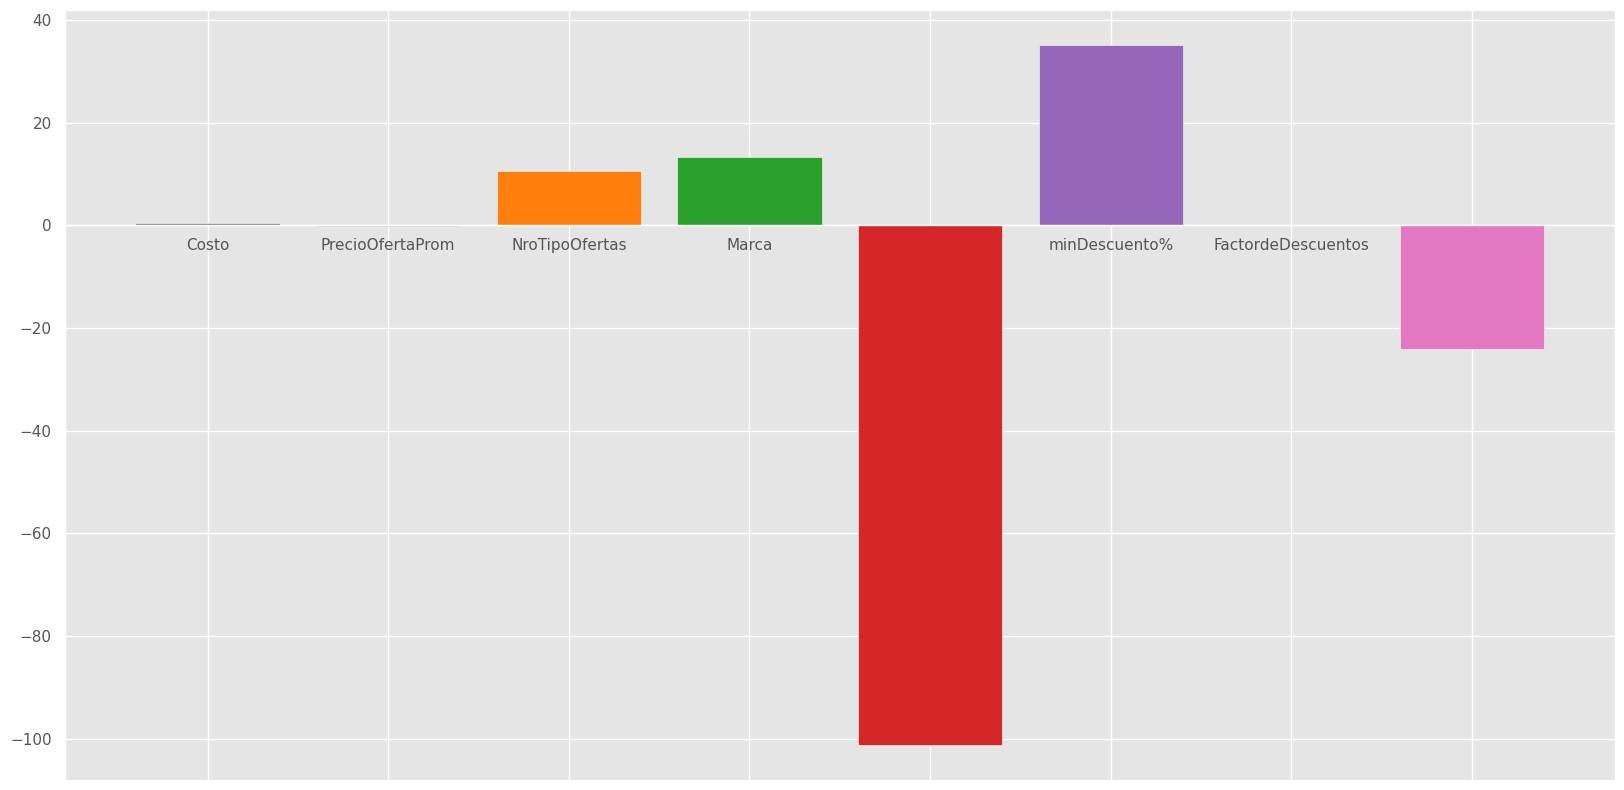

In [59]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive']

ax.bar(X_train.columns ,
ridge_lasso.Coefficient_Estimate,
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Performace del Modelo

In [60]:
pred_test_lasso= model_lasso.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lasso)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_lasso))

MAE: 1951.3631268537138
MSE: 19913906.547327813
RMSE: 4462.500033314041
MAPE: 1042.670777939748


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

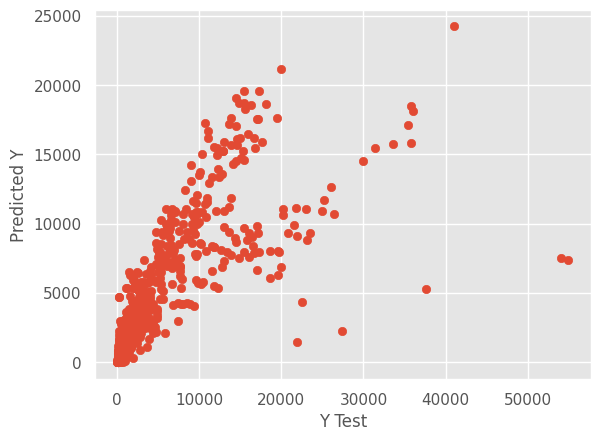

In [61]:
plt.scatter(y_test,pred_test_lasso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Regresión Elastic Net

In [62]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, np.sqrt(y_train))


ElasticNet(alpha=0.01)

In [63]:
ridge_elastic_net= pd.DataFrame()
ridge_elastic_net["Columns"]= X_train.columns
ridge_elastic_net['Coefficient_Estimate'] = pd.DataFrame(model_enet.coef_)
ridge_elastic_net

,Columns,Coefficient_Estimate
0,Costo,0.451630
1,PrecioOfertaProm,-0.219350
2,NroTipoOfertas,10.352057
3,Marca,14.781562
4,MaxDescuento%,-45.624460
5,minDescuento%,15.918996
6,FactordeDescuentos,8.487669
7,FlagCampana,-3.679162


## Gráfico de los Parámetros del Modelo Eslastic Net

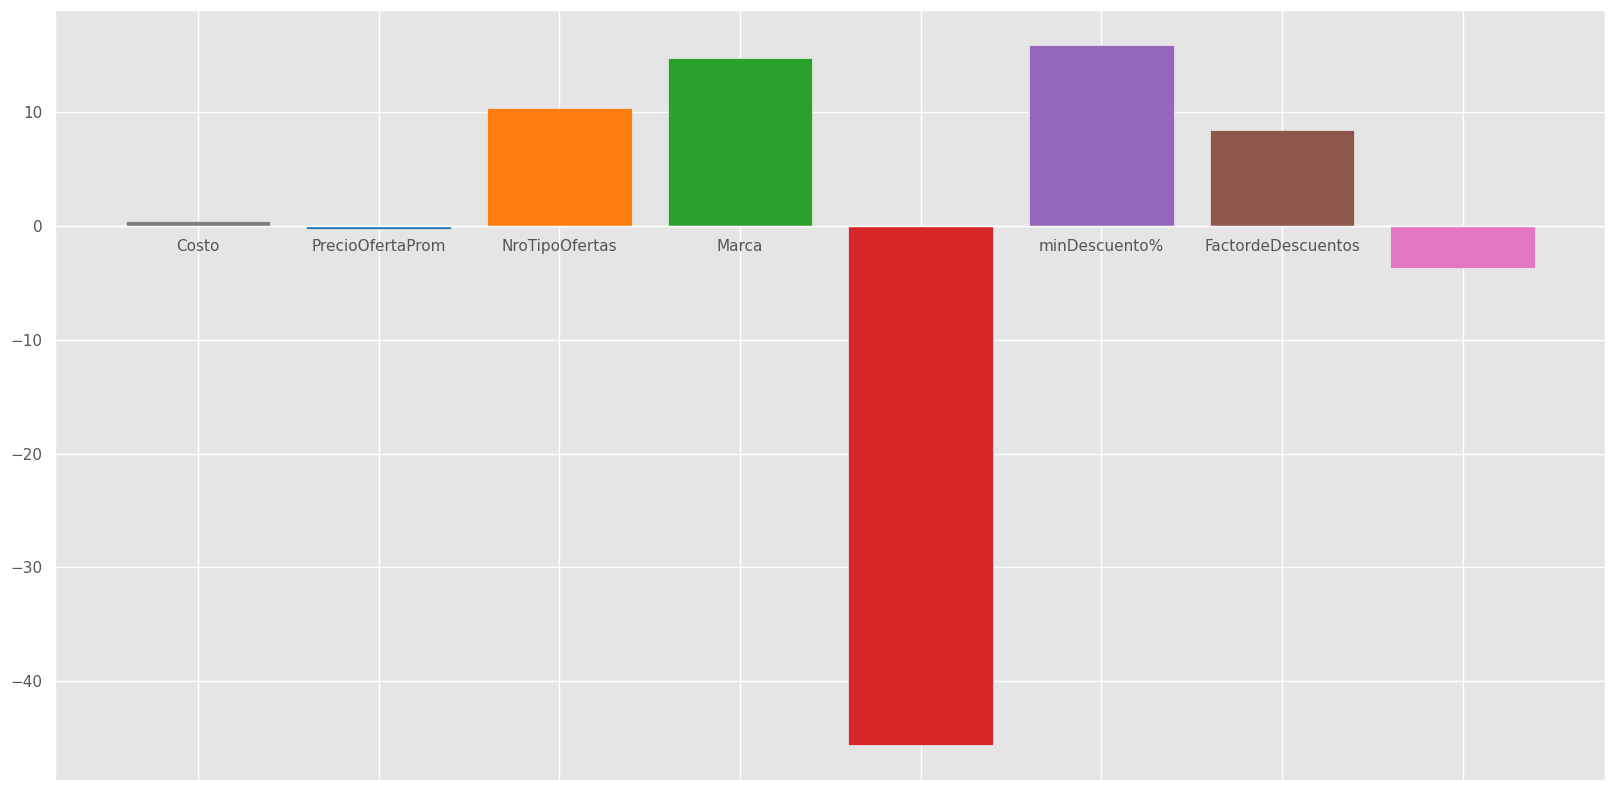

In [64]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive']

ax.bar(X_train.columns ,
ridge_elastic_net.Coefficient_Estimate,
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Performace del Modelo

In [65]:
pred_test_enet= model_enet.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_enet))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_enet))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_enet)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_enet))

MAE: 1944.321065959473
MSE: 20490681.681675456
RMSE: 4526.663415991458
MAPE: 1032.0192105663346


### Gráfico de test

Text(0, 0.5, 'Predicted Y')

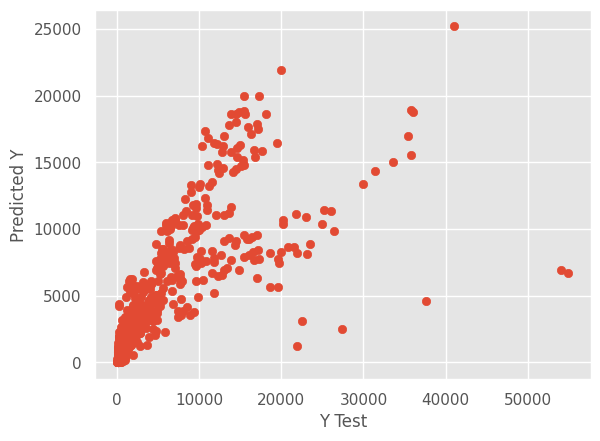

In [66]:
plt.scatter(y_test,pred_test_enet)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')